In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from scipy import interpolate

## Load data

In [3]:
data_boyarsk = pd.read_excel('data/boyarsk2021.xlsx')

dm = np.array(data_boyarsk['Dm'])
dm_clip = dm[76:781]
o3 = np.array(data_boyarsk['O3 (2 м)'])
o3_clip = o3[76:781]

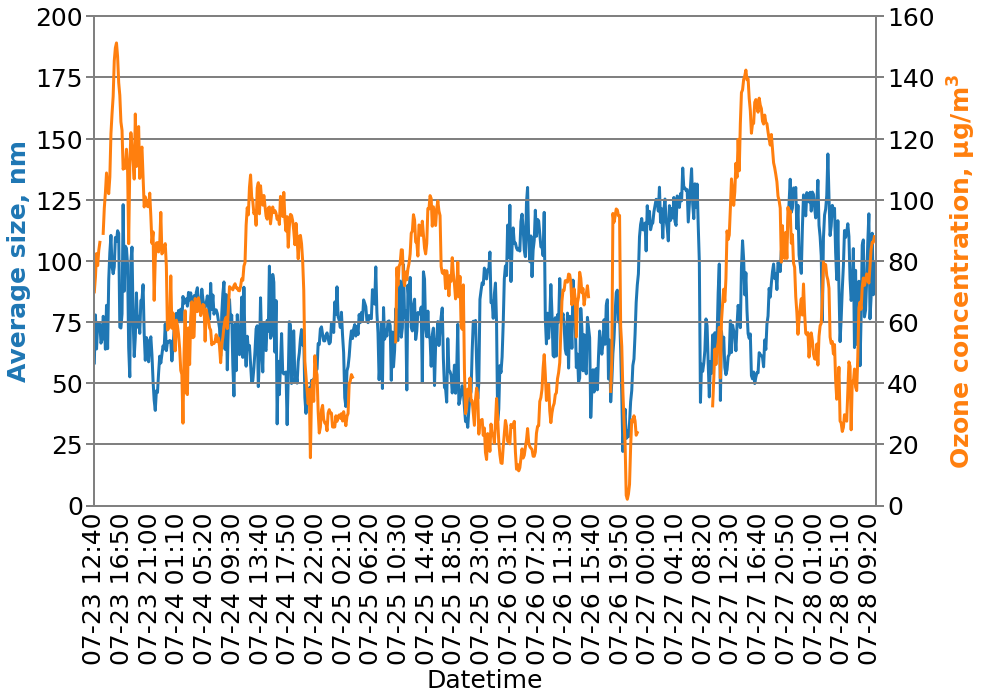

In [4]:
fig, ax1 = plt.subplots(figsize=(14,9))

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

ax2 = ax1.twinx()


plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

ax1.set_ylabel("Average size, nm", fontsize=25, color='C0', fontweight='bold')
ax2.set_ylabel("Ozone concentration, ${\mathbf{\mu g/m^3}}$", fontsize=25, color='C1', fontweight='bold')
ax2.yaxis.set_label_coords(1.09, 0.48)

ax2.grid(axis='y', lw=2, color='grey')


label_pos = np.arange(76, 781)
label = [str(item)[5:-3] for item in data_boyarsk[data_boyarsk.columns[2]][label_pos]]

ax2.plot(label_pos, data_boyarsk['O3 (2 м)'][76:781], color='C1', lw=3)
ax1.plot(label_pos, data_boyarsk['Dm'][76:781]*900000000, lw=3)
ax2.set_ylim([0,160])
ax1.set_ylim([0, 200])

ax1.tick_params(bottom = False)

ax1.tick_params('both', length=8, which='major', color='grey', width='2')
ax2.tick_params('both', length=8, which='major', color='grey', width='2')

for spine in ax2.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(2)

ax1.set_xticks(ticks=label_pos[::25], labels=label[::25], va='center')
ax1.xaxis.set_tick_params(rotation=90, labelsize=25, pad=75)
plt.xlim([76, 781])
ax1.set_xlabel("Datetime", fontsize=25)
plt.savefig("data.pdf", bbox_inches='tight', format='pdf')

## Resampling field data for model input

In [5]:
# np.savetxt("data/23july.txt", o3_clip[45:210])
# np.savetxt("data/25july.txt", o3_clip[285:440])
# np.savetxt("data/3days.txt", o3_clip[5:440])

In [6]:
# import numpy as np
# import matplotlib.pyplot as plt
# import resampy
# a = np.loadtxt("data/23july.txt")
# plt.title("before resampling")
# plt.plot(a)
# interp_arr = resampy.resample(a, a.shape[0]*5, 1020*5)
# plt.figure()
# plt.title("after resampling")
# plt.plot(interp_arr[10:-10])
# np.savetxt("data/23july_resampled.txt", interp_arr[10:-10]/80)
# print(interp_arr[10:-10].max())
# print(interp_arr[10:-10].min())

In [7]:
# import resampy
# import numpy as np
# import matplotlib.pyplot as plt
# a = np.loadtxt("data/25july.txt")
# plt.title("before resampling")
# plt.plot(a)
# interp_arr = resampy.resample(a, a.shape[0]*5, 1020*5)
# plt.figure()
# plt.title("after resampling")
# plt.plot(interp_arr[10:-10])
# np.savetxt("data/25july_resampled.txt", interp_arr[10:-10]/80)
# print(interp_arr[10:-10].max())
# print(interp_arr[10:-10].min())

In [8]:
# import numpy as np
# import matplotlib.pyplot as plt
# import resampy
# a = np.loadtxt("data/3days.txt")
# a[229:269] = np.copy(a[107:147]/1.2-5.)
# a[1] = (a[3]-a[0])/3.+a[0]
# a[2] = (a[3]-a[0])/3.+a[1]
# plt.title("before resampling")
# plt.plot(a)

# interp_arr = resampy.resample(a, a.shape[0]*5, 6060*5)
# res = np.concatenate((np.ones(2500)*interp_arr[30], interp_arr[30:-30]))
# res[:500] = np.copy(res[3200:3700-nan_ind]*1.5-18)
# res[500:1000] = np.copy(res[3200:3700]*1.5-18)
# res[1000:1500] = np.copy(res[3200:3700]*1.5-18)
# res[1500:2000] = np.copy(res[3200:3700]*1.5-18)
# res[2000:2500] = np.copy(res[3200:3700]*1.5-18)
# plt.figure()
# plt.title("after resampling")
# plt.plot(res)
# np.savetxt("data/3days_resampled.txt", res/80)
# print(res.max())
# print(res.min())

## Data model mapping

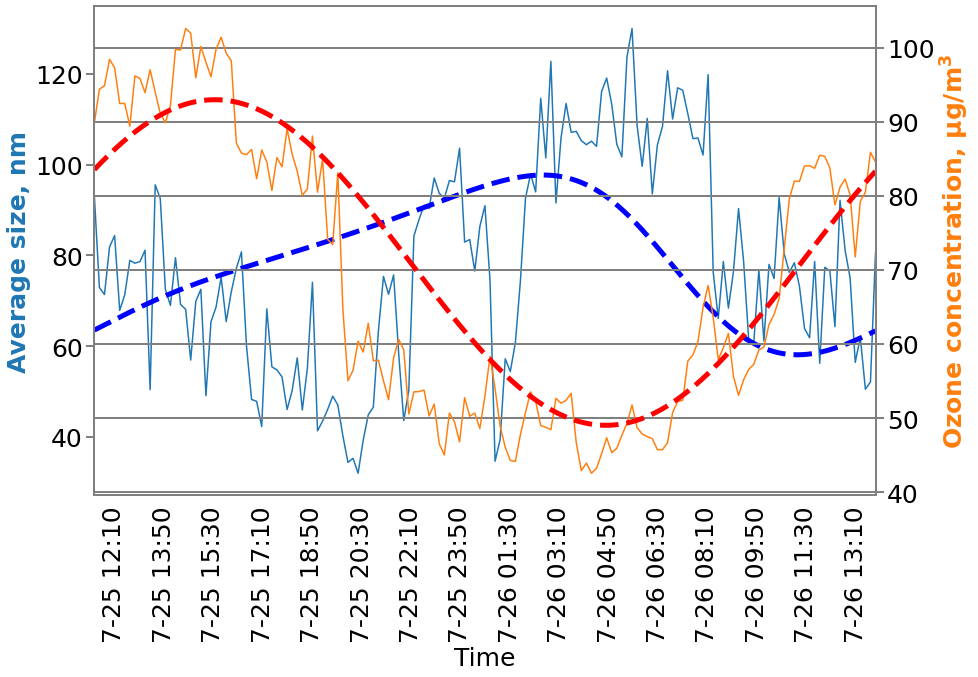

In [11]:
files = {"smooth_23_july": "0.txt", 
        "direct_23_july": "1.txt", 
        "smooth_25_july": "2.txt",
        "direct_25_july": "3.txt", 
        "3_days": "4.txt"}

shapes = {"smooth_23_july": (4000, 80), 
        "direct_23_july": (1800, 20, 40), 
        "smooth_25_july": (4000, 80),
        "direct_25_july": (2000, 20, 40), 
        "3_days": (8500, 20, 40)}

vals = {"smooth_23_july": [45, 210], 
        "direct_23_july": [45, 210], 
        "smooth_25_july": [285, 440],
        "direct_25_july": [285, 440], 
        "3_days": [5, 440]}

ranges = {"smooth_23_july": [0, 3999], 
        "direct_23_july": [800, 1800], 
        "smooth_25_july": [3000, 3999],
        "direct_25_july": [1000, 2000], 
        "3_days": [2500, 8500]}

o3_coefs = {"smooth_23_july": [25, 45], 
        "direct_23_july": [1400, -10], 
        "smooth_25_july": [23, 25],
        "direct_25_july": [1400, -10], 
        "3_days": [1400, -10]}

dm_coefs = {"smooth_23_july": [100, -330], 
        "direct_23_july": [50, -470], 
        "smooth_25_july": [50, -120],
        "direct_25_july": [50, -470], 
        "3_days": [50, -440]}

name = 'smooth_25_july'

y = np.loadtxt("res.txt")
x = np.loadtxt("I.txt")

y = y.reshape(shapes[name])

val = 11
val1 = vals[name][0]
val2 = vals[name][1]
st = ranges[name][0]
en = ranges[name][1]

coef = np.linspace(1,40, shapes[name][1])
sizes = (y[st:en, :])*coef

label = data_boyarsk[data_boyarsk.columns[2]][76:781]
sin_labels = label[val1:val2]
ticks_sin = [str(item)[6:-3] for item in sin_labels]
pos_sin = np.linspace(15,584,val2-val1)

fig, ax1 = plt.subplots(figsize=(14,9))
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

coef = np.linspace(1,40, shapes[name][1])
sizes = (y[st:en,:])*coef

ax2 = ax1.twinx()
ax1.plot(np.linspace(0, 584, val2-val1), dm_clip[val1:val2]*900000000)
ax2.plot(np.linspace(0, 584, val2-val1), o3_clip[val1:val2]/1.5+35, 'C1')

ax2.plot(np.linspace(0,584,en-st), x[st:en]*o3_coefs[name][0]+o3_coefs[name][1], 'r--', lw=5)
ax1.plot(np.linspace(0,584,en-st), (sizes.mean(axis=1)/y[st:en,:].mean(axis=1))*dm_coefs[name][0]+dm_coefs[name][1], 'b--', lw=5)

ax1.set_ylabel("Average size, nm", fontsize=25, color='C0', fontweight='bold')
ax2.set_ylabel("Ozone concentration, ${\mathbf{\mu g/m^3}}$", fontsize=25, color='C1', fontweight='bold')

ax2.grid(axis='y', lw=2, color='grey')
plt.yticks(fontsize=25)

ax1.set_xlim([0,584])
ax2.set_xlim([0,584])

ax1.tick_params(bottom = False)

ax1.tick_params('both', length=8, which='major', color='grey', width='2')
ax2.tick_params('both', length=8, which='major', color='grey', width='2')

for spine in ax2.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(2)


ax1.set_xticks(ticks=pos_sin[::10], labels=ticks_sin[::10], va='center')
ax1.xaxis.set_tick_params(rotation=90, labelsize=25, pad=70)
ax1.set_xlabel("Time", fontsize=25)
plt.savefig("map.pdf", bbox_inches='tight', format='pdf')

## Particle size distributions (THIS IS BASED ON SMOOTH 23 JULY SIN)

/tmp/ipykernel_31094/3061435850.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


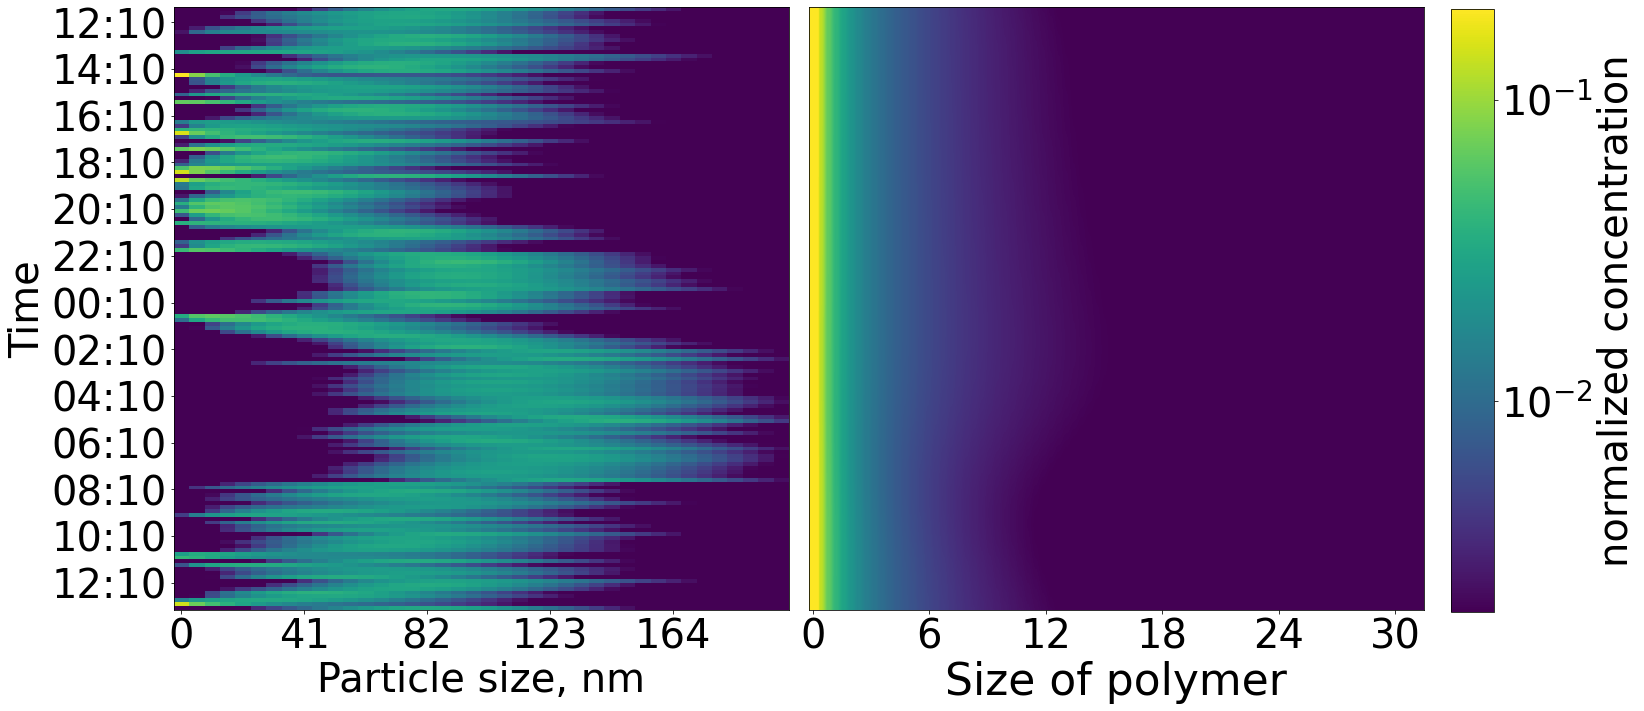

In [12]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

sp_ticks=['0~5', '5~10', '10~15', '15~20', '20~25', '25~30', '30~35', '35~40',
       '40~45', '45~50', '50~55', '55~60', '60~65', '65~70', '70~75', '75~80',
       '80~85', '85~90', '90~95', '95~100', '100~105', '105~110', '110~115',
       '115~120', '120~125', '125~130', '130~135', '135~140', '140~145',
       '145~150', '150~155', '155~160', '160~165', '165~170', '170~175',
       '175~180', '180~185', '185~190', '190~195', '195~200']

sp_ticks_pos = np.arange(len(sp_ticks))

dd = data_boyarsk[sp_ticks][76:781]
dt = data_boyarsk['Unnamed: 2'][76:781]
dd = (dd[dd.columns][val1:val2]).values
dt = dt[val1:val2].values
dt_time = [str(item)[11:-13] for item in dt]

val = 11

sizes = np.copy(y[st:en, :])

fig, ax = plt.subplots(1, 2, figsize=(20,10))

ax[0].set_xticks(sp_ticks_pos[::8], np.floor(np.linspace(0, 200, len(sp_ticks_pos))).astype(int)[::8], fontsize=40)
ax[0].set_yticks((np.arange(len(dt_time))+3.5)[::12], dt_time[::12], fontsize=40)
ax[0].set_ylabel("Time", fontsize=40)
ax[0].set_xlabel("Particle size, nm", fontsize=40)

ax[1].set_yticks([])
ax[1].set_xticks(np.linspace(0, 100, 100)[::15], np.linspace(0, 40, 100)[::15].astype(int), fontsize=40)
ax[1].set_xlabel("Size of polymer", fontsize=44)

normed = sizes[:,:]
normed_ma = np.zeros((en-st,normed.shape[1]-1))
normed_new = np.zeros((en-st,100))
for i in range(normed.shape[0]):
    normed[i] = normed[i]/normed[i].sum()
    normed_ma[i] = moving_average(normed[i],2)
    xx = np.arange(len(normed_ma[i]))
    xxx = np.linspace(0, len(normed_ma[i])-1, 100)
    f = interpolate.interp1d(xx, normed_ma[i])
    normed_new[i]=f(xxx)
    

normed_dd = dd[:,:].astype(float)
normed_dd_ma = np.zeros((normed_dd.shape[0]-4,normed_dd.shape[1]))

for i in range(normed_dd.shape[0]):
    normed_dd[i] = normed_dd[i]/normed_dd[i].sum()

for i in range(normed_dd.shape[1]):
    normed_dd_ma[:,i] = moving_average(normed_dd[:,i],5)
    
normed_dd[normed_dd<0.01] = 0.01
im = ax[0].imshow(normed_dd[:, :], aspect='auto', norm=LogNorm(vmin=0.01, vmax=0.2))
im = ax[1].imshow(normed[:, :], aspect='auto', norm=LogNorm(vmin=0.002, vmax=0.2))

cbar_ax = fig.add_axes([1.01, 0.143, 0.03, 0.837])

cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=40)
cbar.set_label("normalized concentration", fontsize=40)
plt.minorticks_off()

fig.tight_layout()

plt.savefig("heatmap.pdf", bbox_inches='tight', format='pdf')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


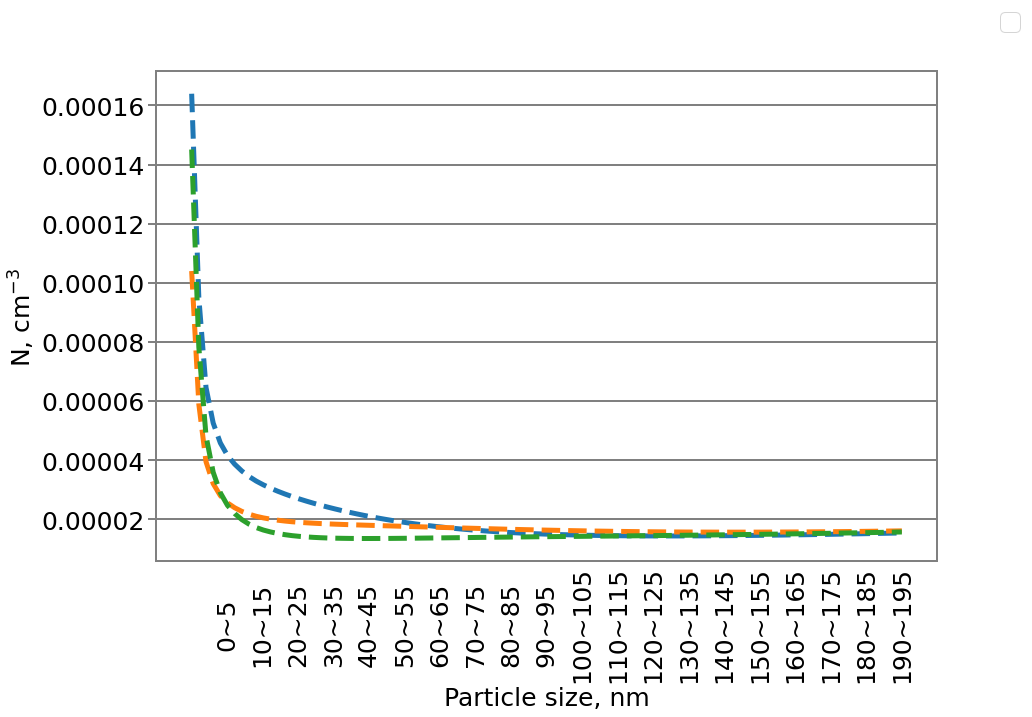

In [19]:
fig, ax1 = plt.subplots(figsize=(14,9))

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

vss = [54, 101, 141]

normed_dd = dd[:,:].astype(float)


#for i in range(normed_dd.shape[0]):
#    normed_dd[i] = normed_dd[i]/normed_dd[i].sum()

#ax1.plot(normed_dd[vss[0], :], color='C0', label="t="+str(dt_time[vss[0]]), lw=5)
#ax1.plot(normed_dd[vss[1], :], color='C1', label="t="+str(dt_time[vss[1]]), lw=5)
#ax1.plot(normed_dd[vss[2], :], color='C2',label="t="+str(dt_time[vss[2]]), lw=5)

ax1.set_ylabel("N, cm$^{-3}$", fontsize=25,color='black')
ax1.set_xlabel("Particle size, nm", fontsize=25, color='black')

ax1.grid(axis='y', lw=2, color='grey')

ax1.tick_params(bottom = False)

ax1.tick_params('both', length=8, which='major', color='grey', width='2')

for spine in ax1.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(2)

#ax1.set_xlim([0,1])
#ax1.set_ylim([0.0,1600])

ax1.set_xticks(ticks=sp_ticks_pos[::2], labels=sp_ticks[::2], va='center')
ax1.xaxis.set_tick_params(rotation=90, labelsize=25, pad=55)

#plt.xlim(0,40)
fig.legend(fontsize=25)#, bbox_to_anchor=(-0.2, 0.32, 0.55, 0.55))


vs = [0.,0.,0.]
vs[0] = int(vss[0]/(val2-val1)*(en-st))
vs[1] = int(vss[1]/(val2-val1)*(en-st))
vs[2] = int(vss[2]/(val2-val1)*(en-st))

val = 11

sizes = np.copy(y[st:en, :])
sizes = (y[st:en, :])*coef


plt.yticks(fontsize=25)
plt.xticks(fontsize=25)


normed = sizes[:,:]
normed_ma = np.zeros((en-st,normed.shape[1]-1))
normed_new = np.zeros((en-st,100))
for i in range(normed.shape[0]):
    #normed[i] = normed[i]/normed[i].sum()
    normed_ma[i] = moving_average(normed[i],2)
    xx = np.arange(len(normed_ma[i]))
    xxx = np.linspace(0, len(normed_ma[i])-1, 100)
    f = interpolate.interp1d(xx, normed_ma[i])
    normed_new[i]=f(xxx)

x_ax = np.linspace(-2, 38, normed_new[vs[0], ::].shape[0])
ax1.plot(x_ax[:], normed_new[vs[0], ::], color='C0', linestyle='dashed', lw=5)
ax1.plot(x_ax[:], normed_new[vs[1], ::], color='C1', linestyle='dashed', lw=5)
ax1.plot(x_ax[:], normed_new[vs[2], ::], color='C2', linestyle='dashed', lw=5)

#ins=ax1.inset_axes([0.67,0.66,0.3,0.3])
#ins.plot(normed_dd[vss[0], :], color='C0', label="t="+str(dt_time[vss[0]]), lw=2)
#ins.plot(normed_dd[vss[1], :], color='C1', label="t="+str(dt_time[vss[1]]), lw=2)
#ins.plot(normed_dd[vss[2], :], color='C2',label="t="+str(dt_time[vss[2]]), lw=2)

#ins.set_xticks([])
#ins.set_yticks([])

#ins.tick_params('both', length=8, which='major', color='grey', width='2')

for spine in ax1.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(2)

vs = [0.,0.,0.]
vs[0] = int(vss[0]/(val2-val1)*(en-st))
vs[1] = int(vss[1]/(val2-val1)*(en-st))
vs[2] = int(vss[2]/(val2-val1)*(en-st))

val = 18

sizes = np.copy(y[st:en, :])

normed = sizes[:,:]
normed_ma = np.zeros((en-st,normed.shape[1]-1))
normed_new = np.zeros((en-st,100))
for i in range(normed.shape[0]):
    #normed[i] = normed[i]/normed[i].sum()
    normed_ma[i] = moving_average(normed[i],2)
    xx = np.arange(len(normed_ma[i]))
    xxx = np.linspace(0, len(normed_ma[i])-1, 100)
    f = interpolate.interp1d(xx, normed_ma[i])
    normed_new[i]=f(xxx)

#x_ax = np.linspace(-2, 38, normed_new[vs[0], ::].shape[0])
#ins.plot(x_ax[:], 3e7*normed_new[vs[0], ::], color='C0', linestyle='dashed', lw=2)
#ins.plot(x_ax[:], 3e7*normed_new[vs[1], ::], color='C1', linestyle='dashed', lw=2)
#ins.plot(x_ax[:], 3e7*normed_new[vs[2], ::], color='C2', linestyle='dashed', lw=2)



plt.savefig("spectra_11.pdf", bbox_inches='tight', format='pdf')